# Solução via série de Fourier
Neste notebook vamos demonstrar a solução via Série de Fourier de um problema de vibração forçada amortecida, quando você já sabe a série da Função, que veio, por exemplo, de uma tabela ou de uma busca na internet.

## Setup

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Fórmulas
Supondo que a  força aplicada seja periódica, com frequência fundamental $\omega = 2\pi/\tau$, podemos escrevê-la como

$$ f(t) = \frac{a_0}{2} + \sum_{j=1}^\infty
\left[ a_j \cos(j \omega t) + b_j \sin(j \omega t) \right],$$
com
$$ a_j = \int_0^\tau f(t) \cos(j\omega t)\, dt, \quad
   b_j = \int_0^\tau f(t) \sin(j\omega t)\, dt. $$

## Resposta
Neste caso, a resposta é dada por

$$x(t) = \frac{a_0}{2k} + 
\sum_{j=1}^{\infty}
\left[ \frac{a_j/k}{\sqrt{(1-(jr)^2)^2 + (2j\zeta r)^2}}\cos(j\omega t - \phi_j)
+
 \frac{b_j/k}{\sqrt{(1-(jr)^2)^2 + (2j\zeta r)^2}}\sin(j\omega t - \phi_j)
 \right],$$
com 
$$ r = \frac{\omega}{\omega_n}, \quad \tan \phi_j  = \frac{2j\zeta r}{1-(jr)^2}.$$

## Sistema mecânico

In [ ]:
m = 1
c = 0.2
k = 40
wn = np.sqrt(k/m)
cc = 2*m*wn
zeta = c/cc
taun = 2*np.pi/wn
print(f"Frequência natural: {wn:.3g} rad/s, Período natural: {taun:.3g} s")
print(f"Razão de amortecimento: {100*zeta:.2g}%")

Frequência natural: 6.32 rad/s, Período natural: 0.993 s
Razão de amortecimento: 1.6%


## Força externa
Vamos tomar como exemplo uma função senoidal retificada, mostrada abaixo.
<img src="https://drive.google.com/uc?export=view&id=1BqaHb0i2IOeg-gHsXruVluLO_RJM-Z5P" width="500">

A série de Fourier desta função, conforme a tabela disponível no material, é

$$f(t) =  \frac{2A}{\pi} - \sum_{n=1}^\infty \frac{4A}{\pi(4n^2-1)}\cos(n \omega_0 t), $$
com $\omega_0 = (2\pi)/T$.

Como esta é uma função par, temos uma série em cossenos apenas.

## Parâmetros da força

In [ ]:
A = 10
T = 2.3

w0 = 2*np.pi/T

## Cálculo dos coeficientes da série

Temos que escolher a priori o número de coeficientes.

[4.24413182 0.84882636 0.36378273 0.20210152 0.12861006 0.08903773
 0.06529434 0.04993096 0.03941918 0.03191077 0.02636107 0.0221433
 0.01886281 0.01626104 0.01416284]


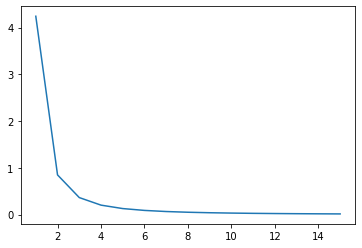

In [ ]:
nterm = 15

ens = np.arange(1, nterm+1)
an = (4*A)/(np.pi*(4*ens**2 -1))
print(an)
fig, ax = plt.subplots()
ax.plot(ens, an)
fig.show()

## Cálculo da resposta
Precisamos definir em que tempos calcular a resposta.

In [ ]:
nT = 4
points_per_cycle = 400
final_time = nT*T
total_points = nT*points_per_cycle
times = np.linspace(0, final_time, total_points, endpoint=True)

Só precisamos calcular os termos em cosseno! Vou mudar $j$ para $n$ para ficar consistente.

$$ A_n = \frac{a_n/k}{\sqrt{(1-(nr)^2)^2 + (2n\zeta r)^2}}.$$

[1.30421138e-01 8.31587287e-02 1.33670161e-02 2.54422189e-03
 8.77306884e-04 3.89345428e-04 2.00472898e-04 1.14090489e-04
 6.98288527e-05 4.51798652e-05 3.05449838e-05 2.14013218e-05
 1.54456139e-05 1.14294080e-05 8.64030917e-06]


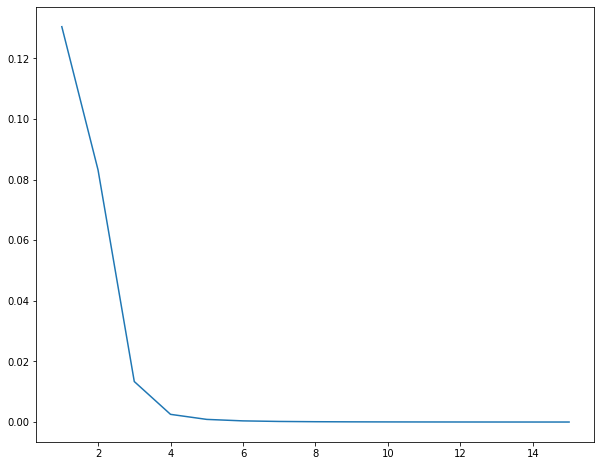

In [ ]:
r = w0/wn
An = (an/k)/np.sqrt((1-(ens*r)**2)**2 + (2*ens*zeta*r)**2)
print(An)
fig, ax = plt.subplots()
ax.plot(ens, An)
fig.set_size_inches(10, 8)
fig.show()

Precisamos também dos ângulos de fase,
$$\phi_n  =\arctan \left( \frac{2n\zeta r}{1-(nr)^2} \right).$$

In [ ]:
phin = np.arctan2(2*ens*zeta*r, 1 - (ens*r)**2)

Podemos agora calcular todos os cossenos para todos os tempos e frequências.

In [ ]:
cwt = np.cos(w0*ens[:,np.newaxis]*times - phin[:, np.newaxis])

E, finalmente, a reposta, somando tudo.

In [ ]:
xp = 2*A/(k*np.pi) - An.dot(cwt)

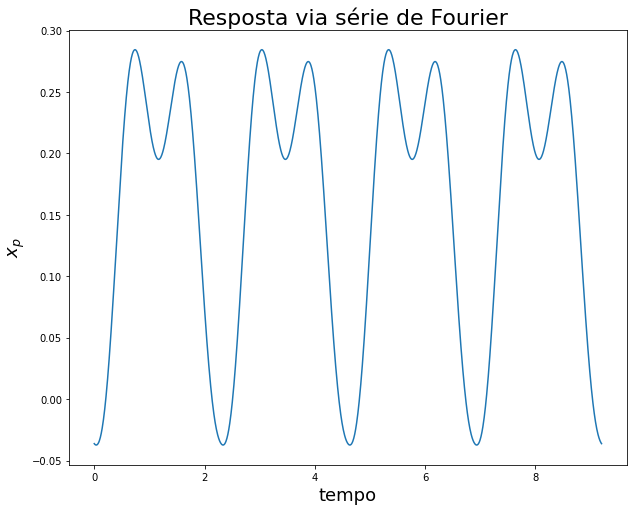

In [ ]:
fig, ax = plt.subplots()
ax.plot(times, xp)
ax.set_title("Resposta via série de Fourier",fontsize=22)
ax.set_ylabel(r"$x_p$", fontsize=18)
ax.set_xlabel("tempo", fontsize=18)
fig.set_size_inches(10, 8)
fig.show()